# 1.2

In [3]:
def fibon(x):
    if x in {1,2}:
        return 1
    else:
        if x < 1:
            return 0
        else:
            return fibon(x-1) + fibon(x-2)


In [4]:
import time

for i in range(1,42,2):
    start_time = time.time()
    fibon(i)
    print(i,"- %s seconds" % (time.time() - start_time))

(1, '- 0.0 seconds')
(3, '- 0.0 seconds')
(5, '- 0.0 seconds')
(7, '- 0.0 seconds')
(9, '- 0.0 seconds')
(11, '- 0.0 seconds')
(13, '- 0.0 seconds')
(15, '- 0.00100016593933 seconds')
(17, '- 0.000999927520752 seconds')
(19, '- 0.00399994850159 seconds')
(21, '- 0.00800013542175 seconds')
(23, '- 0.021999835968 seconds')
(25, '- 0.0610001087189 seconds')
(27, '- 0.186000108719 seconds')
(29, '- 0.444999933243 seconds')
(31, '- 0.885999917984 seconds')
(33, '- 2.16199994087 seconds')
(35, '- 5.52600002289 seconds')
(37, '- 14.3159999847 seconds')
(39, '- 38.0480000973 seconds')
(41, '- 97.3150000572 seconds')


In [5]:
def fib(n, sum):
    if n < 1:
        return sum
    else:
        return fib(n-1, sum+n)

c = 998
print(fib(c, 0))

RuntimeError: maximum recursion depth exceeded

In [6]:
import sys

sys.setrecursionlimit(500)

# 1.4

In [7]:
import math,cmath
x = 2 - 3j
y = -1 + 0j
print "модуль", abs(x)
print "модуль", abs(y)
print "аргумент", cmath.phase(x), math.atan2(x.imag, x.real)
print "аргумент", cmath.phase(y), math.atan2(y.imag, y.real)

def comp(z):
    return abs(z), math.atan2(z.imag, z.real)

print comp(x)
f = 5
print comp(f)
print type(comp(x))

модуль 3.60555127546
модуль 1.0
аргумент -0.982793723247 -0.982793723247
аргумент 3.14159265359 3.14159265359
(3.605551275463989, -0.982793723247329)
(5, 0.0)
<type 'tuple'>


In [8]:

def comp_2(z):
    """Return the module and the argument of complex z.

    >>> comp_2(0+0j)
    (0.0, 0.0)
    >>> comp_2(2-3j)
    (3.605551275463989, -0.982793723247329)
    >>> comp_2(-1+0j)
    (1.0, 3.141592653589793)
    """

    return comp(z)


if __name__ == "__main__":
    import doctest
    doctest.testmod()

In [9]:
comp_2(0+0j)
comp_2(2-3j)
comp_2(-1+0j)

(1.0, 3.141592653589793)

# 1.6

In [10]:
class ComplexNumber:
    def __init__(self, real, image):
        self.r = real
        self.i = image
        
    def get_real(self):
        return self.r
    
    def get_image(self):
        return self.i  
    
    def set_real(self, newr):
        self.r = newr
    
    def set_image(self,newi):
        self.i = newi
        
    def get_module_and_argument(self):
        return comp(self)

# 1.7

In [11]:
import time
def timer(f):
    def tmp(*args, **kwargs):
        t = time.time()
        res = f(*args, **kwargs)
        print "Время выполнения функции: %f" % (time.time()-t)
        return res

    return tmp

@timer
def fib(N):
    return fibon(N)

fib(30)

Время выполнения функции: 0.509000


832040

In [12]:
import collections
import functools
 
class memoized(object):
    def __init__(self, func):
        self.func = func
        self.cache = {}
    def __call__(self, *args):
        if not isinstance(args, collections.Hashable):
            # uncacheable. a list, for instance.
            # better to not cache than blow up.
            return self.func(*args)
        if args in self.cache:
            return self.cache[args]
        else:
            value = self.func(*args)
            self.cache[args] = value
            return value
    def __repr__(self):
        '''Return the function's docstring.'''
        return self.func.__doc__
    def __get__(self, obj, objtype):
        '''Support instance methods.'''
        return functools.partial(self.__call__, obj)
 
@timer
@memoized
def fibonacci(n):
    "Return the nth fibonacci number."
    if n in (0, 1):
        return n
    return fibonacci(n-1) + fibonacci(n-2)
 
print fibonacci(20)

Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.001000
Время выполнения функции: 0.000000
Время выполнения функции: 0.001000
Время выполнения функции: 0.000000
Время выполнения функции: 0.001000
Время выполнения функции: 0.000000
Время выполнения функции: 0.001000
Время выполнения функции: 0.000000
Время выполнения функции: 0.001000
Время выполнения функции: 0.000000
Время выполнения функции: 0.001000
Время выполнения функции: 0.000000
Время выполнения функции: 0.001000
Время выполнения функции: 0.000000
Время выполнения функции: 0.001000
Время выполнения функции: 0.000000
Время выполнения функции: 0.001000
Время выполнения функции: 0.000000
Время выполнения функции: 0.001000
Время выполнения функции: 0.000000
Время выполнения функции: 0.001000
Время выполнения функции: 0.000000
Время выполнения функции: 0.001000
Время выполнения функции: 0.000000
Время выполнения функции: 0.001000
Время выполнения функции: 0.000000
Время выполнения фун

In [13]:
@memoized
@timer
def fibonacci(n):
    "Return the nth fibonacci number."
    if n in (0, 1):
        return n
    return fibonacci(n-1) + fibonacci(n-2)
 
print fibonacci(20)

Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.000000
Время выполнения функции: 0.001000
Время выполнения функции: 0.001000
Время выполнения функции: 0.001000
Время выполнения функции: 0.001000
Время выполнения функции: 0.001000
Время выполнения функции: 0.001000
Время выполнения функции: 0.001000
Время выполнения функции: 0.001000
Время выполнения функции: 0.001000
Время выполнения функции: 0.001000
Время выполнения функции: 0.001000
Время выполнения функции: 0.001000
Время выполнения функции: 0.001000
Время выполнения функции: 0.001000
6765


класс memoized берет передаваемую функцию и при вызове элемента класса запускает ее от аргумента, если таковой еще не встречался и сохраняет результат запуска, либо использует сохраненное значение, если передаваемая функция на данных аргументах уже запускалась; функция timer, по сути просто запускается и отрабатывает, принимая оборачиваемую функцию за аргумент. разница в выдаваемых ответах в этом и кроется, потому что в случае 
@memoized
@timer
мы по сути сохраняем ответы функции timer,
а в 
@timer
@memoized
мы выводим времена расчетов и при использовании сохраненного значения время получается близко к 0.000000, оттого и чередуются значения времен


# 1.8

property() позволяет отделить атрибуты класса от его функций, позволяет напрямую обращаться к атрибуту, например для наиболее часто встречающегося примера:
class C:
    def __init__(self):
        self._x = None
 
    def getx(self):
        return self._x
 
    def setx(self, value):
        self._x = value
 
    def delx(self):
        del self._x
 
    x = property(getx, setx, delx, "I'm the 'x' property.")
    
Если c экземпляр C, c.x будет вызывать получатель, c.x = value будет вызывать установщик и del c.x - удаляющего, таким образом не требуя обращения через self

## 2.soup

In [14]:
from bs4 import BeautifulSoup

In [15]:
import urllib2
import requests

In [16]:
page = requests.get("http://www.rbc.ru/business/19/04/2016/5715f72f9a7947cd111ecf63?from=main")
soup = BeautifulSoup(page.text)
print soup

<!DOCTYPE html>
<!--[if lt IE 7]>
<html class="no-js lt-ie7"> <![endif]--><!--[if IE 7]>
<html class="no-js ie7"> <![endif]--><!--[if IE 8]>
<html class="no-js ie8"> <![endif]--><!--[if IE 9]>
<html class="no-js ie9"> <![endif]--><!--[if gt IE 9]><!--><html class="no-js"> <!--<![endif]-->
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/><script type="text/javascript">window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var o=t[n]={exports:{}};e[n][0].call(o.exports,function(t){var o=e[n][1][t];return r(o||t)},o,o.exports)}return t[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(e,t,n){function r(e,t){return function(){o(e,[(new Date).getTime()].concat(a(arguments)),null,t)}}var o=e("handle"),i=e(2),a=e(3);"undefined"==typeof window.newrelic&&(newrelic=NREUM);var u=["setPageViewName","addPageAction"

C:\Users\vbjh\Anaconda2\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [17]:
x = soup.find('div', attrs={'class':'article__text'})
print x.text







Основатель Theranos Элизабет Холмс

Фото:  AP 

Биотехнологическую компанию Theranos подозревают в обмане инвесторов. Прокуратура выясняет, какую информацию стартап предоставлял о собственной системе анализа крови
Федеральная прокуратура США начала расследование в отношении биотехнологического стартапа Theranos, основанного самой молодой женщиной среди self-made миллиардеров мира Элизабет Холмс, пишет The Wall Street Journal со ссылкой на источники. По их словам, цель расследования состоит в том, чтобы выяснить, вводила ли компания инвесторов и государственных чиновников в заблуждение.
Расследование находится на ранней стадии, рассказали источники. По их словам, прокуроры начали собирать информацию о Theranos в январе-феврале, направляя неофициальные запросы. В частности, несколько инвесторов Theranos получили запросы на предоставление информации о том, как компания описывала запатентованную систему анализа крови, позволяющую, по ее утверждению, получить точные результаты с помощ

код по середине так и не понял как убрать

# 3.1

In [18]:
import numpy as np
my_arr = np.ndarray(shape = (3,4,2))
my_arr[0,0,0] = 5
print my_arr

[[[  5.00000000e+000   2.99160306e-316]
  [  1.53648685e-316   5.86382563e-316]
  [  1.58395075e-316   5.70027567e-316]
  [  1.53648685e-316   5.67401984e-316]]

 [[  1.58395075e-316   5.79591334e-316]
  [  1.53648685e-316   5.64834226e-316]
  [  1.58395075e-316   5.81915972e-316]
  [  1.53648685e-316   5.71694861e-316]]

 [[  1.58395075e-316   5.81915261e-316]
  [  1.53648685e-316   5.67406568e-316]
  [  1.58395075e-316   5.85016096e-316]
  [  1.53648685e-316   5.85231983e-316]]]


In [19]:
print my_arr[0] 

[[  5.00000000e+000   2.99160306e-316]
 [  1.53648685e-316   5.86382563e-316]
 [  1.58395075e-316   5.70027567e-316]
 [  1.53648685e-316   5.67401984e-316]]


In [20]:
print my_arr.item((0,2,0))

1.58395074542e-316


In [21]:
my_arr.put([0,1],5)
my_arr.put(20,15)
print my_arr
print my_arr.take((0,1,20))

[[[  5.00000000e+000   5.00000000e+000]
  [  1.53648685e-316   5.86382563e-316]
  [  1.58395075e-316   5.70027567e-316]
  [  1.53648685e-316   5.67401984e-316]]

 [[  1.58395075e-316   5.79591334e-316]
  [  1.53648685e-316   5.64834226e-316]
  [  1.58395075e-316   5.81915972e-316]
  [  1.53648685e-316   5.71694861e-316]]

 [[  1.58395075e-316   5.81915261e-316]
  [  1.53648685e-316   5.67406568e-316]
  [  1.50000000e+001   5.85016096e-316]
  [  1.53648685e-316   5.85231983e-316]]]
[  5.   5.  15.]


# 3.2

In [22]:
import time

my_list = [1,2,3,4]
my_arr = np.array(my_list)
t = time.time()
for x in range(1000):
    print my_list
    
time_list =  time.time()-t

t = time.time()
for x in range(1000):
    print my_arr
    
time_arr =  time.time()-t

[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1, 2, 3, 4]

In [23]:
print "list: ", time_list
print "array: ", time_arr

list:  0.0230000019073
array:  0.516000032425


# 3.3

In [24]:
np.linspace(2.0, 3.0, num=5)

array([ 2.  ,  2.25,  2.5 ,  2.75,  3.  ])

In [25]:
def listspace(start, end, num = 50, endpoint = True, retstep = False):
    if endpoint:
        step = (float(end) - float(start))/(num-1)
    else:
        step = (float(end) - float(start))/num
    a = [start + step*i for i in range(num)]
    if retstep:
        return a, step
    else:
        return a

In [26]:
for i in range(10,10000011,1000000):
    print i
    t = time.time()
    np.linspace(2.0, 3.0, num=i)
    print "array: ", time.time()-t
    t = time.time()
    listspace(2.0, 3.0, num=i)
    print "list: ", time.time()-t
    print

10
array:  0.0
list:  0.0

1000010
array:  0.007000207901
list:  0.221999883652

2000010
array:  0.0130000114441
list:  0.362999916077

3000010
array:  0.039999961853
list:  0.450000047684

4000010
array:  0.0440001487732
list:  0.727999925613

5000010
array:  0.055999994278
list:  0.756000041962

6000010
array:  0.055999994278
list:  0.927999973297

7000010
array:  0.0650000572205
list:  1.51699995995

8000010
array:  0.0699999332428
list:  1.4470000267

9000010
array:  0.0699999332428
list:  1.30100011826

10000010
array:  0.085000038147
list:  1.50099992752



# Mathplotlib

# 4.1

In [27]:
import matplotlib
%matplotlib inline

при выполнении магии %matplotlib inline питон понимает, что графики нужно стоить прямо в блокноте

# 4.2-4.3

In [152]:
my_x = np.linspace(0.0, 30.0, num=50)
my_y = my_x**2+50*np.sin(my_x)
my_z = my_x**2
my_w = my_x+50*np.sin(my_x)

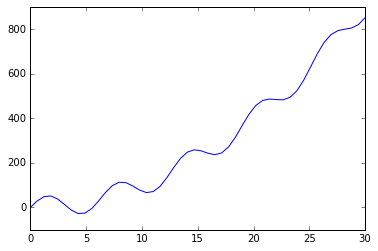

In [153]:
plt.plot(my_x, my_y)

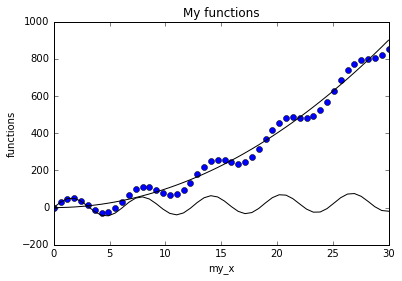

In [154]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.title('My functions')
plt.xlabel('my_x')
plt.ylabel('functions')
plt.plot(my_x, my_y,'bo',my_x,my_z,'k',my_x,my_w,'k')

In [155]:
fig.savefig('func.png')

# 4.4 

Я пытался создать свой scale, наподобие того, который использован для логарифма и экспоненты, но, увы, поэтому просто квадратичная и кубическая функции

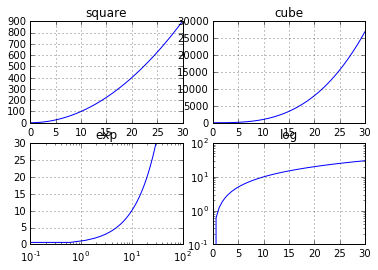

In [159]:
my_x = np.linspace(0.0, 30.0, num=50)
my_square = my_x**2
my_cube = my_x**3
my_z = my_x

plt.figure(1)

# square
ax = plt.subplot(221)
ax.set_yscale('linear')
ax.plot(my_x, my_square)
plt.title('square')
ax.grid(True)


# cubic
plt.subplot(222)
plt.gca().set_xscale('linear')
plt.plot(my_x, my_cube)
plt.title('cube')
plt.grid(True)

# exp
plt.subplot(223)
plt.plot(my_x, my_z)
plt.xscale('log')
plt.title('exp')
plt.grid(True)

# log
plt.subplot(224)
plt.plot(my_x, my_z)
plt.yscale('log')
plt.title('log')
plt.grid(True)

plt.show()

# 4.5

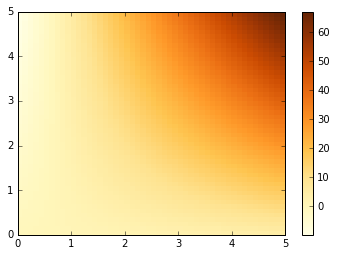

In [197]:
delta = 0.1
y, x = np.mgrid[0:5+delta:delta,0:5+delta:delta]
z = 3*x*y + x - 2*y

plt.pcolor(x,y,z, cmap=plt.cm.YlOrBr)
plt.colorbar()
plt.show()

# 4.6

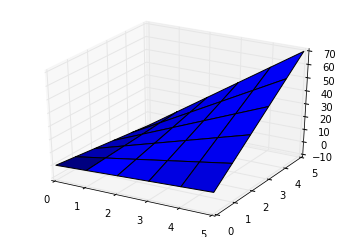

In [198]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z)
plt.show()

# 5.Все вместе + SciPy

[ 0.96974089  2.16002458 -3.24975105  1.06296689] <type 'numpy.ndarray'>


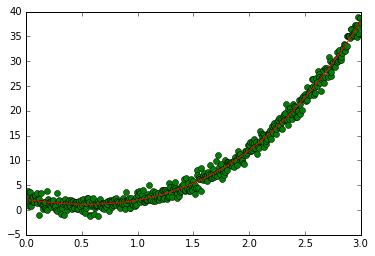

In [238]:
from scipy.optimize import minimize

x = np.linspace(0.0, 3.0, num=501)
y = x**3 + 2*x**2 - 3*x + 2
y_broken = y + np.random.normal(0, 1, 501)

def Err(coef):
    return sum(abs(coef[0] * x ** 3 + coef[1] * x ** 2 + coef [2] * x + 2 * coef[3] - y_broken))
coef = minimize(Err, [0,0,0,0]).x

y_rebuilt = coef[0]*x**3 + coef[1]*x**2 + coef[2]*x + 2*coef[3]

print coef, type(y)
plt.plot(x,y_broken, 'go', x, y_rebuilt, 'r')
plt.show()


# 6.Pandas + Scikit-learn

In [267]:
import pandas as pd

data = pd.read_csv('Skin_NonSkin.txt', delimiter='\t', names = ['r', 'g', 'b', 'target'])
print data['r'][1]
print data.iloc[1]
print data.loc[[1]]

73
r          73
g          84
b         122
target      1
Name: 1, dtype: int64
    r   g    b  target
1  73  84  122       1


In [268]:
app_rg = []
app_r_g = []
app_rb = []
app_r_b = []
app_bg = []
app_b_g = []

for (i,j) in zip(data['r'], data['g']):
    app_rg.append(i*j)
    app_r_g.append(abs(i-j))
    
for (i,j) in zip(data['r'], data['b']):
    app_rb.append(i*j)
    app_r_b.append(abs(i-j))
    
for (i,j) in zip(data['b'], data['g']):
    app_bg.append(i*j)
    app_b_g.append(abs(i-j))

data_new = data.drop('target',1)
target = data['target']
data = data.drop('target',1)

data_new['rg'] = app_rg
data_new['r_g'] = app_r_g
data_new['rb'] = app_rb
data_new['r_b'] = app_r_b
data_new['bg'] = app_bg
data_new['b_g'] = app_b_g
print data_new

          r    g    b     rg  r_g     rb  r_b     bg  b_g
0        74   85  123   6290   11   9102   49  10455   38
1        73   84  122   6132   11   8906   49  10248   38
2        72   83  121   5976   11   8712   49  10043   38
3        70   81  119   5670   11   8330   49   9639   38
4        70   81  119   5670   11   8330   49   9639   38
5        69   80  118   5520   11   8142   49   9440   38
6        70   81  119   5670   11   8330   49   9639   38
7        70   81  119   5670   11   8330   49   9639   38
8        76   87  125   6612   11   9500   49  10875   38
9        76   87  125   6612   11   9500   49  10875   38
10       77   88  126   6776   11   9702   49  11088   38
11       77   88  126   6776   11   9702   49  11088   38
12       77   88  126   6776   11   9702   49  11088   38
13       78   89  127   6942   11   9906   49  11303   38
14       77   85  125   6545    8   9625   48  10625   40
15       78   86  126   6708    8   9828   48  10836   40
16       78   

In [271]:
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC

print 'simple/complex:'
print 'KNC:'
print cross_validation.cross_val_score(KNC(), data, target).mean(),' / ', cross_validation.cross_val_score(KNC(), data_new, target).mean()

print 'LR:' 
print cross_validation.cross_val_score(LR(), data, target).mean(),' / ', cross_validation.cross_val_score(LR(), data_new, target).mean()

print 'RFC:'
print cross_validation.cross_val_score(RFC(), data, target).mean(),' / ', cross_validation.cross_val_score(RFC(), data_new, target).mean()

simple/complex:
KNC:
0.976887054221  /  0.969178696811
LR:
0.897660571837  /  0.987957887968
RFC:
0.968338079188  /  0.961784537393
